In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
salary_data = pd.read_csv(r"C:\Users\abhishek\OneDrive\Desktop\AIML\Salary_data.csv")

In [3]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary_data.info()
salary_data.describe()
salary_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

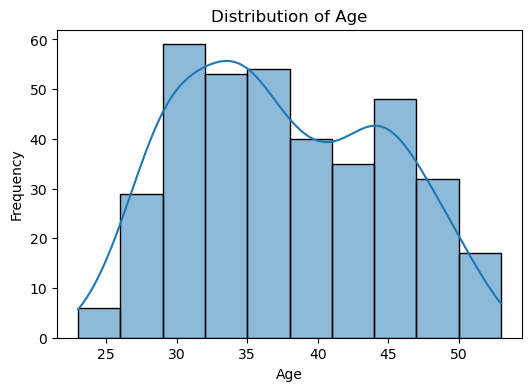

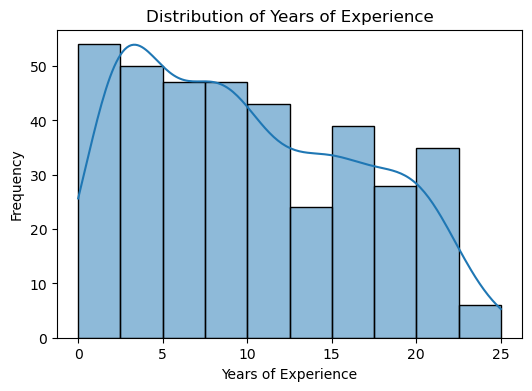

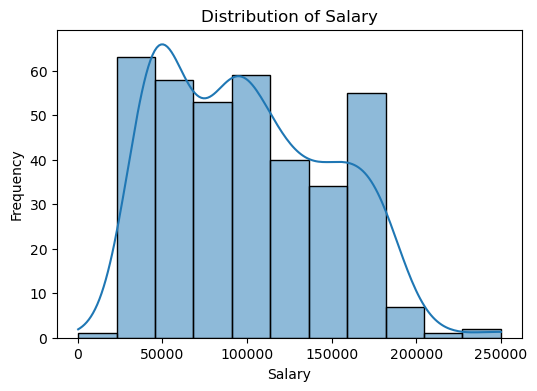

In [5]:
# Plot distributions of numerical features
for column in ['Age', 'Years of Experience', 'Salary']:
    plt.figure(figsize=(6, 4))  # Indentation added here
    sns.histplot(salary_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

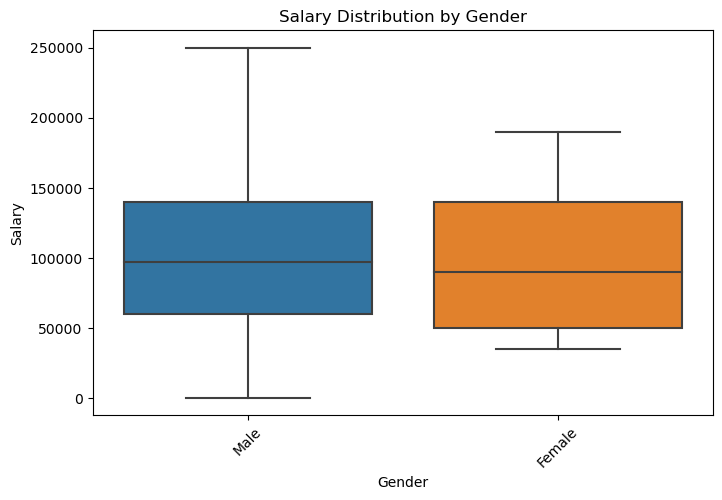

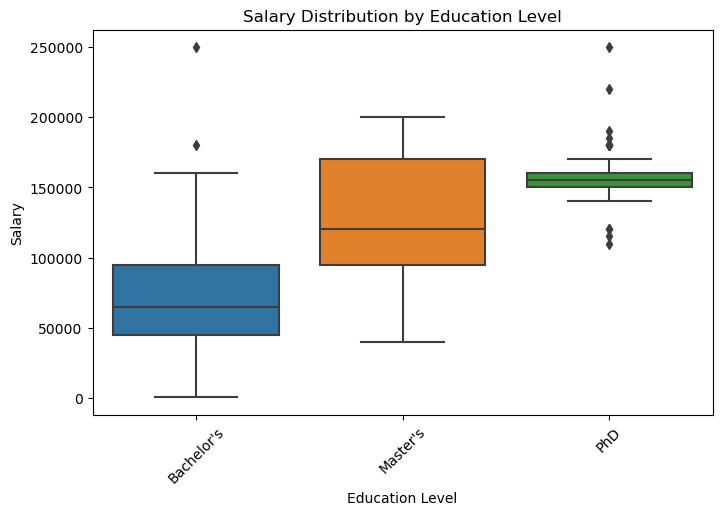

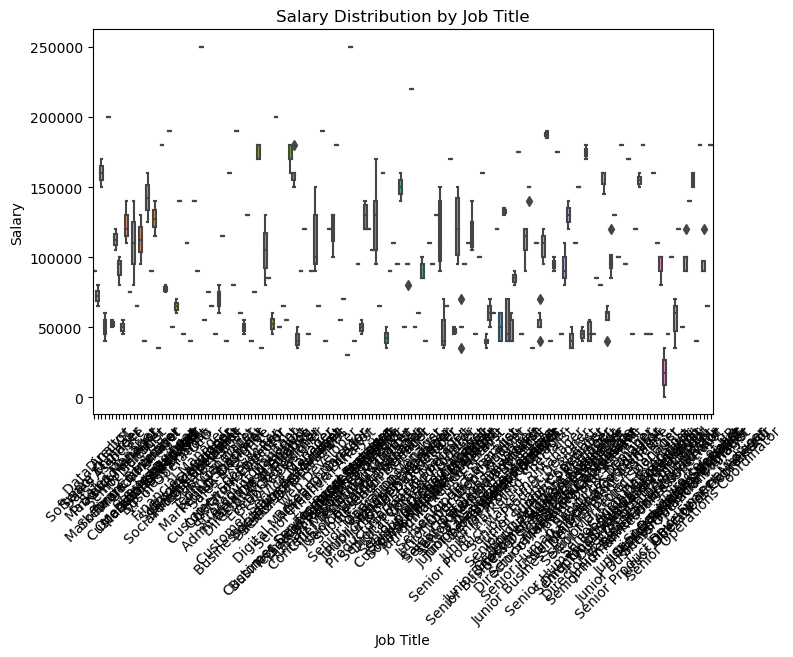

In [6]:
# Box plots for categorical varoables vs salary
for column in ['Gender', 'Education Level', 'Job Title']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=salary_data[column], y=salary_data['Salary'])
    plt.title(f'Salary Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.xticks(rotation=45)
    plt.show()

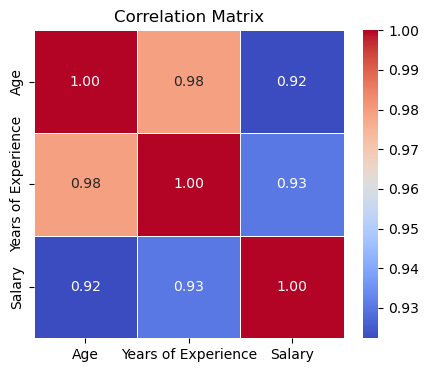

In [7]:
# Correlation heatmap
plt.figure(figsize=(5, 4))

# Select only numeric columns
numeric_data = salary_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Handle missing values
salary_data.fillna(salary_data.median(numeric_only=True), inplace=True)
print(salary_data.isnull().sum())

Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


In [13]:
# Initialize LabelEncoder for Gender
gender_encoder = LabelEncoder()

# Transform Gender column in the entire dataset
salary_data['Gender'] = gender_encoder.fit_transform(salary_data['Gender'])

# Check the transformation
print(salary_data['Gender'].value_counts())


Gender
1    194
0    179
2      2
Name: count, dtype: int64


In [14]:
# Encode 'Education Level' and 'Job Title'
education_encoder = LabelEncoder()
job_title_encoder = LabelEncoder()

salary_data['Education Level'] = education_encoder.fit_transform(salary_data['Education Level'])
salary_data['Job Title'] = job_title_encoder.fit_transform(salary_data['Job Title'])

# Check the dataset after encoding
print(salary_data.head())


    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [15]:
# Split the data into features and target
X = salary_data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = salary_data['Salary']

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}\n")

Mean Absolute Error: 11026.425018748647
R^2 Score: 0.889473256476541



In [19]:
# Coefficients of the Linear Regression model
coefficients = model.coef_
intercept = model.intercept_
feature_names = X_train.columns

In [20]:
# Display Coefficients
print("Model Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")

Model Coefficients:
Age: 3379.9362
Gender: 6545.4726
Education Level: 13714.8112
Job Title: 34.4590
Years of Experience: 2339.3025
Intercept: -63653.8955


In [21]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (375, 5)
Shape of y: (375,)


In [22]:
# Align indices of X and y
X, y = X.align(y, axis=0, join='inner')

# Check the updated shapes
print(f"Aligned Shape of X: {X.shape}")
print(f"Aligned Shape of y: {y.shape}")

Aligned Shape of X: (375, 5)
Aligned Shape of y: (375,)


In [23]:
# Confirm the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (300, 5)
Shape of y_train: (300,)
Shape of X_test: (75, 5)
Shape of y_test: (75,)


In [24]:
# Add Predicted and Actual Salary columns
X_test['Predicted Salary'] = y_pred
X_test['Actual Salary'] = y_test

In [27]:
# Initialize a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Encode 'Gender', 'Education Level', and 'Job Title'
categorical_columns = ['Gender', 'Education Level', 'Job Title']

for column in categorical_columns:
    le = LabelEncoder()
    salary_data[column] = le.fit_transform(salary_data[column])
    label_encoders[column] = le  # Save the encoder for future use


In [29]:
# Map encoded Job Title values back to original job titles for interpretation
job_title_encoder = label_encoders.get('Job Title', None)
if job_title_encoder:
    reverse_mapping = {code: label for code, label in enumerate(job_title_encoder.classes_)}
    X_test['Job Title'] = X_test['Job Title'].map(reverse_mapping)

In [30]:
# Aggregate mean salary by job title
mean_salaries = X_test.groupby('Job Title')[['Predicted Salary', 'Actual Salary']].mean()
mean_salaries.sort_values(by='Predicted Salary', ascending=False, inplace=True)

In [31]:
print("\nMean Salaries by Job Title:")
print(mean_salaries)


Mean Salaries by Job Title:
           Predicted Salary  Actual Salary
Job Title                                 
24            176791.266306  180000.000000
147           172971.176431  150000.000000
6             170577.703888  250000.000000
30            166760.678219  175000.000000
115           165526.962000  166666.666667
...                     ...            ...
70             41454.986259   40000.000000
53             37274.847997   35000.000000
10             36007.512807   40000.000000
106            31042.631332   30000.000000
62             17390.743629   35000.000000

[61 rows x 2 columns]


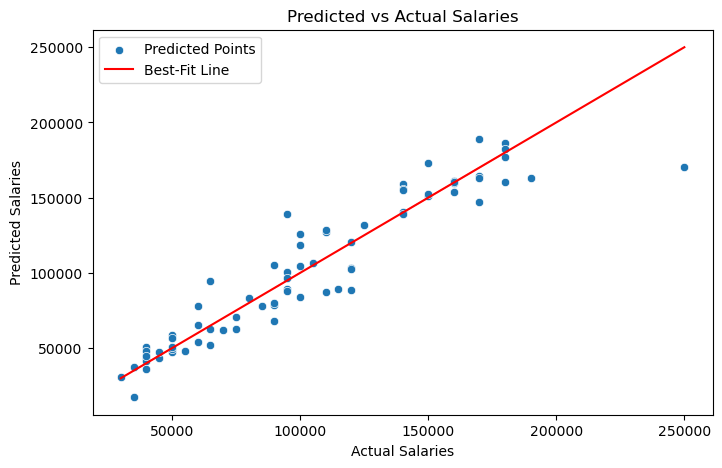

In [32]:
# Visualize Predicted vs Actual Salaries with a Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, label="Predicted Points")
sns.lineplot(x=y_test, y=y_test, color="red", label="Best-Fit Line")  # Adding the regression line
plt.title('Predicted vs Actual Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.legend()
plt.show()

In [33]:
import joblib

In [34]:
# Save the model to a file
joblib.dump(model, 'salary_model.pkl')

print("Model saved as salary_model.pkl")


Model saved as salary_model.pkl


In [35]:
import os
print(os.getcwd())

C:\Users\abhishek
